**Twitter sentiment analysis with Natural Language Processing using the nltk library with python**

In [4]:
import numpy as np # linear algebra
import pandas as pd # data processing
from sklearn.model_selection import train_test_split # function for splitting data to train and test sets

In [5]:
import nltk
from nltk.corpus import stopwords
from nltk.classify import SklearnClassifier

In [7]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [8]:
data = pd.read_csv('/content/drive/MyDrive/Datasets/Sentiment.csv')
data.head()

,id,candidate,candidate_confidence,relevant_yn,relevant_yn_confidence,sentiment,sentiment_confidence,subject_matter,subject_matter_confidence,candidate_gold,name,relevant_yn_gold,retweet_count,sentiment_gold,subject_matter_gold,text,tweet_coord,tweet_created,tweet_id,tweet_location,user_timezone
0,1,No candidate mentioned,1.0,yes,1.0,Neutral,0.6578,None of the above,1.0000,NaN,I_Am_Kenzi,NaN,5,NaN,NaN,RT @NancyLeeGrahn: How did everyone feel about...,NaN,2015-08-07 09:54:46 -0700,629697200650592256,NaN,Quito
1,2,Scott Walker,1.0,yes,1.0,Positive,0.6333,None of the above,1.0000,NaN,PeacefulQuest,NaN,26,NaN,NaN,RT @ScottWalker: Didn't catch the full #GOPdeb...,NaN,2015-08-07 09:54:46 -0700,629697199560069120,NaN,NaN
2,3,No candidate mentioned,1.0,yes,1.0,Neutral,0.6629,None of the above,0.6629,NaN,PussssyCroook,NaN,27,NaN,NaN,RT @TJMShow: No mention of Tamir Rice and the ...,NaN,2015-08-07 09:54:46 -0700,629697199312482304,NaN,NaN
3,4,No candidate mentioned,1.0,yes,1.0,Positive,1.0000,None of the above,0.7039,NaN,MattFromTexas31,NaN,138,NaN,NaN,RT @RobGeorge: That Carly Fiorina is trending ...,NaN,2015-08-07 09:54:45 -0700,629697197118861312,Texas,Central Time (US & Canada)
4,5,Donald Trump,1.0,yes,1.0,Positive,0.7045,None of the above,1.0000,NaN,sharonDay5,NaN,156,NaN,NaN,RT @DanScavino: #GOPDebate w/ @realDonaldTrump...,NaN,2015-08-07 09:54:45 -0700,629697196967903232,NaN,Arizona


In [9]:
data = data[['text','sentiment']]

In [10]:
data.head()

,text,sentiment
0,RT @NancyLeeGrahn: How did everyone feel about...,Neutral
1,RT @ScottWalker: Didn't catch the full #GOPdeb...,Positive
2,RT @TJMShow: No mention of Tamir Rice and the ...,Neutral
3,RT @RobGeorge: That Carly Fiorina is trending ...,Positive
4,RT @DanScavino: #GOPDebate w/ @realDonaldTrump...,Positive


In [11]:
data  = data[data.sentiment != "Neutral"]

In [12]:
data.sentiment

1        Positive
3        Positive
4        Positive
5        Positive
6        Negative
           ...   
13866    Negative
13867    Positive
13868    Positive
13869    Negative
13870    Positive
Name: sentiment, Length: 10729, dtype: object

In [13]:
# Splitting the dataset into train and test set
train, test = train_test_split(data,test_size = 0.2)

**Making a seprate train and test set for positive and negative sets**

In [14]:
train_pos = train[train.sentiment == 'Positive']
train_pos.head()

,text,sentiment
2238,RT @tedcruz: I believe the American people are...,Positive
10024,RT @kwrcrow: Dr. Carson remark on DC having ha...,Positive
4419,Liberals: is he poor? A victim? Incapable of d...,Positive
3807,RT @KurtSchlichter: Trump is actually right ab...,Positive
9808,RT @SupermanHotMale: And the winner is... The ...,Positive


In [15]:
train_neg = train[train.sentiment == 'Negative']
train_neg.head()

,text,sentiment
3300,@FrankLuntz #GOPDebate focus group looked like...,Negative
534,".@BillHemmer Did you ask Romney if his ""moment...",Negative
74,The Country's going to hell and Megyn Kelly on...,Negative
1401,RT @Mamadoxie: YES @rushlimbaugh. We're waitin...,Negative
2416,RT @DanaCortez: #megynkellydebatequestions lik...,Negative


In [16]:
test_pos = test[test.sentiment == 'Positive']
test_neg = test[test.sentiment == 'Negative']

In [17]:
train_pos = train_pos['text']
train_pos.head()


2238     RT @tedcruz: I believe the American people are...
10024    RT @kwrcrow: Dr. Carson remark on DC having ha...
4419     Liberals: is he poor? A victim? Incapable of d...
3807     RT @KurtSchlichter: Trump is actually right ab...
9808     RT @SupermanHotMale: And the winner is... The ...
Name: text, dtype: object

In [18]:
train_neg = train_neg['text']
train_neg.head()

3300    @FrankLuntz #GOPDebate focus group looked like...
534     .@BillHemmer Did you ask Romney if his "moment...
74      The Country's going to hell and Megyn Kelly on...
1401    RT @Mamadoxie: YES @rushlimbaugh. We're waitin...
2416    RT @DanaCortez: #megynkellydebatequestions lik...
Name: text, dtype: object

In [19]:
import matplotlib.pyplot as plt

Positive words


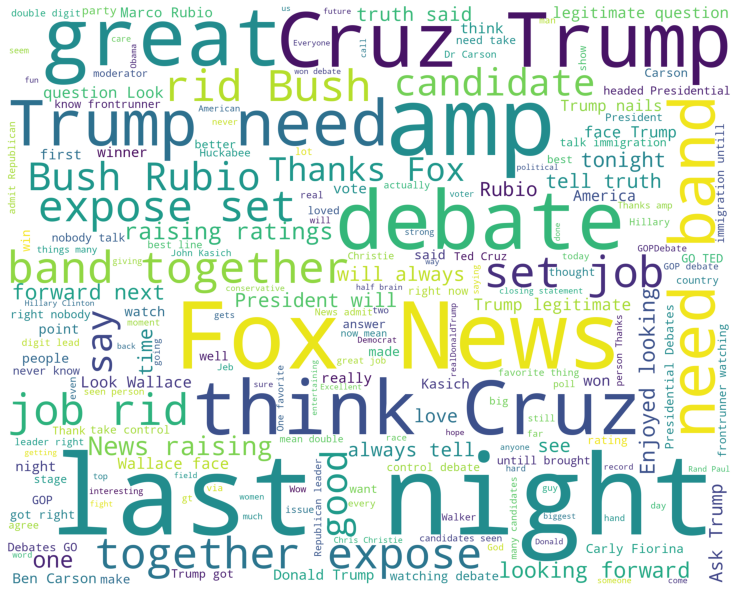

Negative words


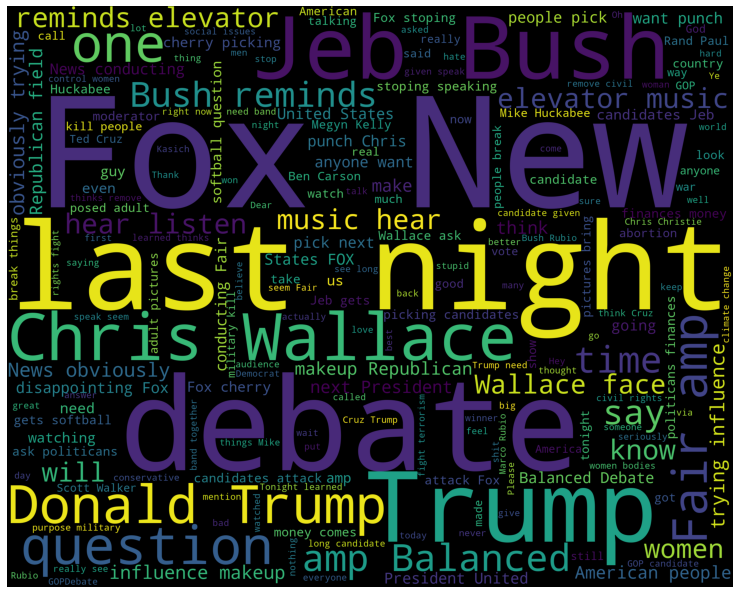

In [20]:
from wordcloud import WordCloud,STOPWORDS
def wordcloud_draw(data, color = 'black'):
    
    words = ' '.join(data)
    
    cleaned_word = " ".join([word for word in words.split()
                            if 'http' not in word
                                and not word.startswith('@')
                                and not word.startswith('#')
                              
                                and word != 'RT'
                            ])
  
    wordcloud = WordCloud(stopwords=STOPWORDS,
                      background_color=color,
                      width=2500,
                      height=2000
                     ).generate(cleaned_word)
    plt.figure(1,figsize=(13, 13))
    plt.imshow(wordcloud)
    plt.axis('off')
    plt.show()
    
print("Positive words")
wordcloud_draw(train_pos,'white')
print("Negative words")
wordcloud_draw(train_neg)

In [21]:
import nltk
nltk.download('stopwords')

[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


True

In [22]:
tweets = []
stopwords_set = set(stopwords.words("english"))

In [32]:
for index,row in train.iterrows():
  words_filtered = [e.lower() for e in row.text.split() if len(e) >=3]
  words_cleaned = [word for word in words_filtered
                   if 'http' not in word
                   and not word.startswith('#')
                   and not word.startswith('@')
                   and word!='RT']
  words_without_stopwords = [word for word in words_cleaned if not word in stopwords_set]
  tweets.append((words_without_stopwords,row.sentiment))

In [36]:
tweets[0]

(['focus',
  'group',
  'looked',
  'like',
  'might',
  'luntz',
  'family',
  'renunion!',
  'real',
  'supporters',
  'lol',
  'you!'],
 'Negative')

In [37]:
test_pos = test[ test['sentiment'] == 'Positive']
test_pos = test_pos['text']
test_neg = test[ test['sentiment'] == 'Negative']
test_neg = test_neg['text']

In [46]:
tweets[0]

(['focus',
  'group',
  'looked',
  'like',
  'might',
  'luntz',
  'family',
  'renunion!',
  'real',
  'supporters',
  'lol',
  'you!'],
 'Negative')

In [50]:
all = []
def get_words_in_tweet(tweet):
  for (words,sentiment) in tweets:
    all.extend(words)
  return all


In [51]:
print(all)

[]


In [52]:
print(get_words_in_tweet(tweets[0][0]))

['focus', 'group', 'looked', 'like', 'might', 'luntz', 'family', 'renunion!', 'real', 'supporters', 'lol', 'you!', '.@billhemmer', 'ask', 'romney', '"moment', 'passed?"', 'would', 'asked', 'reagan', '1980', 'same?', 'worst', 'question', "country's", 'going', 'hell', 'megyn', 'kelly', 'attacking', 'trump', '"war', 'women?"', 'yes', "we're", 'waiting', 'take', 'excellent', 'performances', 'candidates', 'horrendous', 'believe', 'american', 'people', 'looking', 'someone', 'speak', 'truth', 'like', 'effie', 'hunger', 'games.', '"@rwsurfergirl:', 'posed', 'adult', 'pictures.should', 'bring', 'up?', 'woe', 'wait', 'minute', 'dear', 'friends,', 'may', 'seem', 'like', 'fun', "i'm", 'really', 'mad', 'republicans', 'treat', 'people', "can't", 'affor…', 'boy:', '"social', 'issues"', 'gop', 'code', 'control', "women's", 'bodies', '&amp;', 'sexuality', 'most.', 'hold', 'tight,', 'twitterland', 'dr.', 'carson', 'remark', 'half', 'brain,', 'best', 'line', 're:', 'audience', 'cheer', 'trumps', 'insults

In [55]:
def get_word_features(wordlist):
    wordlist = nltk.FreqDist(wordlist)
    features = wordlist.keys()
    return features
w_features = get_word_features(get_words_in_tweet(tweets))

In [56]:
def extract_features(document):
    document_words = set(document)
    features = {}
    for word in w_features:
        features['contains(%s)' % word] = (word in document_words)
    return features

In [57]:
training_set = nltk.classify.apply_features(extract_features,tweets)
classifier = nltk.NaiveBayesClassifier.train(training_set)

In [58]:
neg_cnt = 0
pos_cnt = 0
for obj in test_neg: 
    res =  classifier.classify(extract_features(obj.split()))
    if(res == 'Negative'): 
        neg_cnt = neg_cnt + 1
for obj in test_pos: 
    res =  classifier.classify(extract_features(obj.split()))
    if(res == 'Positive'): 
        pos_cnt = pos_cnt + 1

In [61]:
print("Accuracy for negative tweets")
print((neg_cnt)/len(test_neg)* 100)

Accuracy for negative tweets
94.94186046511628


In [62]:
print("Accuracy for positive tweets")
print((pos_cnt)/len(test_pos)*100)  

Accuracy for positive tweets
35.68075117370892
